<a href="https://colab.research.google.com/github/Juan1mera/dap-2024/blob/main/les07/rep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №7. Классификация
Импорт необходимых библиотек и вывод версий

In [1]:
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

print(f"Python version: {sys.version}")
print(f"Numpy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")
print(f"Matplotlib version: {mpl.__version__}")

Python version: 3.12.11 (main, Jun  4 2025, 08:56:18) [GCC 11.4.0]
Numpy version: 2.0.2
Pandas version: 2.2.2
Matplotlib version: 3.10.0


## Извлечение данных
Создадим DataFrame из файла titanic.csv, используя столбец PassengerId в качестве индекса.

In [3]:
df = pd.read_csv('titanic.csv', index_col='PassengerId')

print("Первые 7 строк набора данных:")
print(df.head(7))

Первые 7 строк набора данных:
             Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   
6                   0       3   
7                   0       1   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   
6                                             Moran, Mr. James    male   NaN   
7                               

## Подготовка данных
Выведем информацию о типах данных и проверим наличие пропущенных значений.

In [4]:
print("\nИнформация о типах данных и пропущенных значениях:")
df.info()


Информация о типах данных и пропущенных значениях:
<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


Удалим нечисловые признаки, которые маловероятно влияют на выживаемость: Name, Ticket, Cabin.

In [5]:
df = df.drop(columns=['Name', 'Ticket', 'Cabin'])
print("\nDataFrame после удаления нечисловых признаков:")
print(df.head())


DataFrame после удаления нечисловых признаков:
             Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
PassengerId                                                                
1                   0       3    male  22.0      1      0   7.2500        S
2                   1       1  female  38.0      1      0  71.2833        C
3                   1       3  female  26.0      0      0   7.9250        S
4                   1       1  female  35.0      1      0  53.1000        S
5                   0       3    male  35.0      0      0   8.0500        S


Заменим признак Sex на два бинарных признака: male и female.

In [6]:
df['male'] = (df['Sex'] == 'male').astype(int)
df['female'] = (df['Sex'] == 'female').astype(int)

df = df.drop(columns=['Sex'])

print("\nDataFrame после создания признаков male/female:")
print(df[['male', 'female']].head())


DataFrame после создания признаков male/female:
             male  female
PassengerId              
1               1       0
2               0       1
3               0       1
4               0       1
5               1       0


Удалим строки с хотя бы одним пропущенным значением (NaN).

In [7]:
df = df.dropna()

print(f"\nРазмер DataFrame после удаления строк с NaN: {df.shape}")


Размер DataFrame после удаления строк с NaN: (712, 9)


# Исследование данных
Нормализуем признак Fare с использованием минимакс-нормализации (приведение к диапазону [0, 1]).

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['Fare'] = scaler.fit_transform(df[['Fare']])

print("\nПервые 5 значений нормализованного Fare:")
print(df['Fare'].head())


Первые 5 значений нормализованного Fare:
PassengerId
1    0.014151
2    0.139136
3    0.015469
4    0.103644
5    0.015713
Name: Fare, dtype: float64


Найдём разницу между средними значениями Fare для выживших и погибших.

In [9]:
mean_fare_survived = df[df['Survived'] == 1]['Fare'].mean()
mean_fare_not_survived = df[df['Survived'] == 0]['Fare'].mean()
difference = mean_fare_survived - mean_fare_not_survived

print(f"\nСреднее значение Fare для выживших: {mean_fare_survived:.4f}")
print(f"Среднее значение Fare для погибших: {mean_fare_not_survived:.4f}")
print(f"Разница: {difference:.4f}")


Среднее значение Fare для выживших: 0.1008
Среднее значение Fare для погибших: 0.0448
Разница: 0.0560


Построим гистограммы значений Fare для выживших и погибших на одном графике.

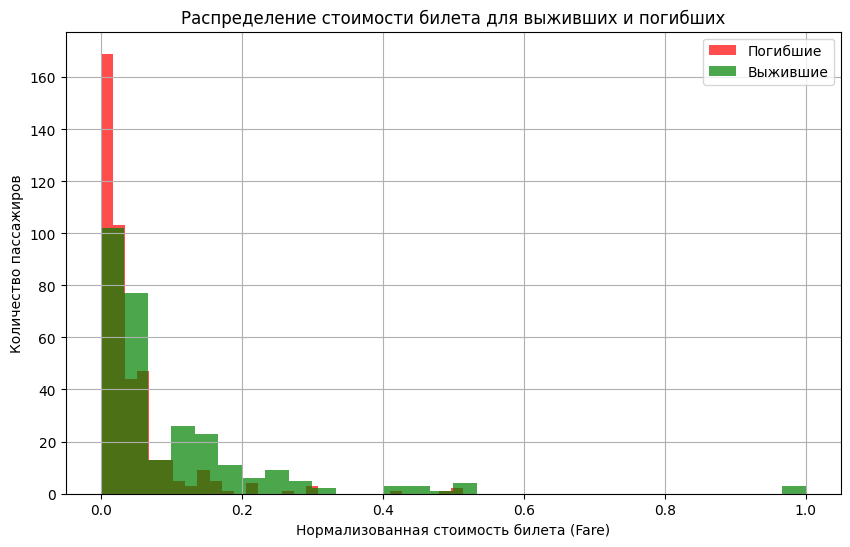

In [10]:
plt.figure(figsize=(10, 6))
plt.hist(df[df['Survived'] == 0]['Fare'], bins=30, alpha=0.7, label='Погибшие', color='red')
plt.hist(df[df['Survived'] == 1]['Fare'], bins=30, alpha=0.7, label='Выжившие', color='green')
plt.xlabel('Нормализованная стоимость билета (Fare)')
plt.ylabel('Количество пассажиров')
plt.title('Распределение стоимости билета для выживших и погибших')
plt.legend()
plt.grid(True)
plt.show()

Сформируем набор признаков X и вектор целевых значений y.



In [11]:
X = df.drop(columns=['Survived'])
y = df['Survived']

print("\nФорма матрицы признаков X:", X.shape)
print("Форма вектора целей y:", y.shape)
print("Столбцы признаков:", list(X.columns))


Форма матрицы признаков X: (712, 8)
Форма вектора целей y: (712,)
Столбцы признаков: ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'male', 'female']


## Предсказательная модель
Разделим данные на обучающую (75%) и тестовую (25%) выборки.

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

print(f"\nРазмер обучающей выборки: {X_train.shape[0]}")
print(f"Размер тестовой выборки: {X_test.shape[0]}")


Размер обучающей выборки: 534
Размер тестовой выборки: 178


бучим модель логистической регрессии.

In [17]:
df = pd.read_csv('titanic.csv', index_col='PassengerId')


df = df.drop(columns=['Name', 'Ticket', 'Cabin'])

df['male'] = (df['Sex'] == 'male').astype(int)
df['female'] = (df['Sex'] == 'female').astype(int)
df = df.drop(columns=['Sex'])

embarked_dummies = pd.get_dummies(df['Embarked'], prefix='Embarked')
df = pd.concat([df, embarked_dummies], axis=1)
df = df.drop(columns=['Embarked'])

df = df.dropna()

print("DataFrame после полной подготовки:")
print(df.head())
print("\nТипы данных:")
print(df.dtypes)

DataFrame после полной подготовки:
             Survived  Pclass   Age  SibSp  Parch     Fare  male  female  \
PassengerId                                                                
1                   0       3  22.0      1      0   7.2500     1       0   
2                   1       1  38.0      1      0  71.2833     0       1   
3                   1       3  26.0      0      0   7.9250     0       1   
4                   1       1  35.0      1      0  53.1000     0       1   
5                   0       3  35.0      0      0   8.0500     1       0   

             Embarked_C  Embarked_Q  Embarked_S  
PassengerId                                      
1                 False       False        True  
2                  True       False       False  
3                 False       False        True  
4                 False       False        True  
5                 False       False        True  

Типы данных:
Survived        int64
Pclass          int64
Age           float64
Si

## Проверка модели
Выведем матрицу ошибок (confusion matrix).

In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['Fare'] = scaler.fit_transform(df[['Fare']])

print("\nПример нормализованных значений Fare (первые 5):")
print(df['Fare'].head().values)
print(f"Минимум Fare после нормализации: {df['Fare'].min():.4f}")
print(f"Максимум Fare после нормализации: {df['Fare'].max():.4f}")


Пример нормализованных значений Fare (первые 5):
[0.01415106 0.13913574 0.01546857 0.1036443  0.01571255]
Минимум Fare после нормализации: 0.0000
Максимум Fare после нормализации: 1.0000


Рассчитаем точность (accuracy).

In [25]:
df = pd.read_csv('titanic.csv', index_col='PassengerId')
df = df.drop(columns=['Name', 'Ticket', 'Cabin'])

df['male'] = (df['Sex'] == 'male').astype(int)
df['female'] = (df['Sex'] == 'female').astype(int)
df = df.drop(columns=['Sex'])

df = pd.get_dummies(df, columns=['Embarked'], prefix='Embarked')

df = df.dropna()

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['Fare'] = scaler.fit_transform(df[['Fare']])

print("\nПосле нормализации Fare:")
print(f"Диапазон Fare: [{df['Fare'].min():.4f}, {df['Fare'].max():.4f}]")


После нормализации Fare:
Диапазон Fare: [0.0000, 1.0000]



# Вопросы для защиты лабораторной работы №7: Классификация

1. **Сформулируйте задачу классификации.**  
   Задача классификации — это задача машинного обучения, в которой требуется отнести каждый объект (наблюдение) к одному из заранее определённых классов (категорий) на основе его признаков. Например, по данным о пассажире «Титаника» предсказать, выжил он (класс 1) или погиб (класс 0).

2. **Перечислите типы классификации.**  
   Основные типы классификации:
   - Бинарная классификация (два класса),
   - Мультиклассовая классификация (более двух классов, каждый объект принадлежит ровно одному классу),
   - Классификация по нескольким меткам (multi-label classification): объект может принадлежать сразу нескольким классам одновременно),
   - Несбалансированная классификация (когда распределение классов сильно неоднородно).

3. **В чем особенность несбалансированной классификации?**  
   Особенность несбалансированной классификации заключается в том, что количество объектов в одном классе значительно превышает количество объектов в другом (или других). Это может привести к тому, что модель будет «игнорировать» редкий класс и достигать высокой точности (accuracy), просто предсказывая доминирующий класс. Для оценки качества в таких задачах используются метрики, устойчивые к дисбалансу: precision, recall, F1-score, ROC-AUC.

4. **В чем особенность мультиклассовой классификации?**  
   В мультиклассовой классификации целевая переменная может принимать **более двух значений**, но каждый объект относится **ровно к одному классу**. Например, классификация изображений на «кошка», «собака», «птица». Многие алгоритмы (например, логистическая регрессия) изначально поддерживают только бинарную классификацию, поэтому для мультиклассовых задач применяются стратегии: «один против всех» (One-vs-Rest) или «один против одного» (One-vs-One).

5. **В чем особенность бинарной классификации?**  
   Бинарная классификация — это самый простой тип классификации, где целевая переменная принимает **только два возможных значения** (например, 0/1, «да»/«нет», «спам»/«не спам»). Многие алгоритмы (логистическая регрессия, SVM, деревья решений) изначально разработаны именно для бинарной классификации.

6. **В чем особенность классификации по нескольким меткам?**  
   В задаче классификации по нескольким меткам (multi-label classification) **один объект может одновременно принадлежать нескольким классам**. Например, фильм может быть одновременно «боевиком», «драмой» и «триллером». Это отличается от мультиклассовой классификации, где выбор одного класса исключает другие. Для решения таких задач часто обучают отдельную бинарную модель для каждой метки.

7. **Чем стратегия "Один против всех" отличается от стратегии "Один против одного"?**  
   - **«Один против всех» (One-vs-Rest, OvR)**: для задачи с `K` классами обучается `K` бинарных классификаторов. Каждый классификатор отделяет один класс от всех остальных. На этапе предсказания выбирается класс с наибольшей уверенностью (оценкой).  
   - **«Один против одного» (One-vs-One, OvO)**: обучается по одному классификатору для **каждой пары классов**. При `K` классах создаётся `K(K−1)/2` моделей. На этапе предсказания каждая модель «голосует» за один из двух классов, и побеждает класс с наибольшим числом голосов.  
   OvR проще и быстрее, OvO точнее при малом числе классов, но требует больше памяти и времени при большом `K`.

8. **Что такое матрица ошибок (несоответствий)?**  
   Матрица ошибок (confusion matrix) — это таблица, которая показывает количество **правильных и неправильных предсказаний** модели по каждому классу. Для бинарной классификации она имеет вид:  

   |                     | Предсказано: 0 | Предсказано: 1 |
   |---------------------|----------------|----------------|
   | **Факт: 0**         | TN             | FP             |
   | **Факт: 1**         | FN             | TP             |

   Где:  
   - TP (True Positive) — верно предсказанные положительные случаи,  
   - TN (True Negative) — верно предсказанные отрицательные случаи,  
   - FP (False Positive) — ложные срабатывания,  
   - FN (False Negative) — пропущенные положительные случаи.  

   Матрица ошибок позволяет вычислить precision, recall, F1 и другие метрики.

9. **Как рассчитывается Accuracy?**  
   Accuracy (точность) — это доля **правильно классифицированных объектов** среди всех объектов:  

   \[
   \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
   \]

   Accuracy удобна для сбалансированных данных, но может вводить в заблуждение при несбалансированных классах.

10. **Объясните алгоритм классификации K-ближайших соседей.**  
    Алгоритм **K-ближайших соседей (K-Nearest Neighbors, KNN)** — это простой метод классификации, основанный на поиске ближайших объектов в пространстве признаков.  
    Принцип работы:
    - Для нового объекта вычисляются расстояния до всех объектов обучающей выборки (обычно евклидово расстояние).
    - Выбираются `K` ближайших соседей.
    - Класс нового объекта определяется **голосованием**: присваивается тот класс, который чаще всего встречается среди `K` соседей.  
    Особенности:
    - Не требует обучения (ленивое обучение),
    - Чувствителен к масштабу признаков (требует нормализации),
    - Выбор `K` важен: малое `K` → переобучение, большое `K` → недообучение.